Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

Given data is in Excel format so reading it and changing to csv and saving in the same path where the excel file exists

In [2]:
read_file = pd.read_excel (r'C:\Users\0004IW744\Desktop\Python\Assignments\7.Clustering\EastWestAirlines.xlsx',sheet_name = 'data')

In [3]:
read_file.to_csv (r'C:\Users\0004IW744\Desktop\Python\Assignments\7.Clustering\EastWestAirlines.csv', 
                         index = None, header=True)

In [4]:
data = pd.read_csv("C:/Users/0004IW744/Desktop/Python/Assignments/7.Clustering/EastWestAirlines.csv")

# EDA-1

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [21]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# 1)Hierarchical Clustering

In [22]:
data_hie = data

In [26]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [27]:
data_hie_norm = norm_func(data_hie.iloc[:,1:]) #Normalizing the numerical data only

In [28]:
data_hie_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


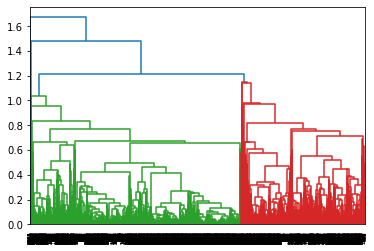

In [33]:
# creating dendrogram using the average 
dendrogram = sch.dendrogram(sch.linkage(data_hie_norm, method='average'))

In [40]:
# create 4 clusters using the euclidean distance
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')

In [41]:
y_hc = hc.fit_predict(data_hie_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [42]:
# assigning Clusters as h_clusterid
data_hie_norm['h_clusterid'] = Clusters

In [43]:
data_hie_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,2
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,2
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,2
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,2
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,2
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,2
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,2
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,2


In [44]:
#Grouping the same clusters and taking average and showing below
data_hie_norm.groupby(['h_clusterid']).agg(['mean']).reset_index

<bound method DataFrame.reset_index of               Balance Qual_miles cc1_miles cc2_miles cc3_miles Bonus_miles  \
                 mean       mean      mean      mean      mean        mean   
h_clusterid                                                                  
0            0.139716   0.003588  0.270000  0.460000  0.000000    0.278508   
1            0.055749   0.019211  0.604167  0.000000  0.541667    0.374412   
2            0.042369   0.012971  0.263759  0.004418  0.001452    0.062730   
3            0.659931   0.000000  0.500000  0.000000  0.000000    0.087400   

            Bonus_trans Flight_miles_12mo Flight_trans_12 Days_since_enroll  \
                   mean              mean            mean              mean   
h_clusterid                                                                   
0              0.280465          0.053400        0.107925          0.611493   
1              0.502907          0.228878        0.334906          0.500362   
2              0.13

# K-Means Clustering

In [45]:
from sklearn.cluster import KMeans

In [46]:
data_KMeans = data

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data_KMeans = scaler.fit_transform(data_KMeans.iloc[:,1:])

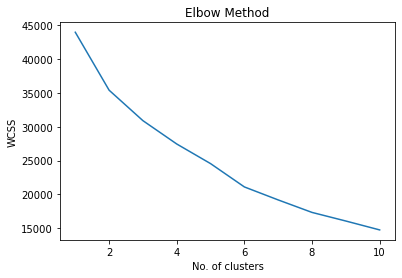

In [48]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data_KMeans)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

In [49]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(6, random_state=80)
clusters_new.fit(scaled_data_KMeans)

KMeans(n_clusters=6, random_state=80)

In [50]:
clusters_new.labels_

array([0, 0, 0, ..., 3, 0, 0])

In [51]:
#Assign clusters to the data set
data_KMeans['clusterid_new'] = clusters_new.labels_

In [52]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-2.99877828e-01, -8.38812329e-02, -5.46113065e-01,
        -9.82418871e-02, -6.03002720e-02, -5.13327798e-01,
        -4.63891883e-01, -2.19653439e-01, -2.41189389e-01,
        -2.41730646e-01, -7.66919299e-01],
       [ 1.18497374e+00,  8.59375779e-01,  1.17640796e-01,
        -9.82418871e-02, -6.27665798e-02,  6.50604815e-01,
         1.67831675e+00,  3.68566141e+00,  3.96263839e+00,
         3.01585091e-01,  8.86971020e-01],
       [ 6.27503218e-01, -1.02952756e-02,  1.48740893e+00,
        -9.82418871e-02, -5.14335677e-02,  1.26597388e+00,
         8.37240383e-01, -7.14137245e-02, -7.28368716e-02,
         4.59934719e-01,  4.42596385e-01],
       [-1.58516994e-01,  7.82563298e-02, -2.64447358e-01,
        -9.82418871e-02, -6.27665798e-02, -2.69448126e-01,
        -1.18024495e-01, -4.02581571e-02, -4.19341205e-02,
         5.04010476e-02,  1.29881129e+00],
       [-4.68896637e-02, -1.56235600e-01, -6.68227273e-01,
         9.03825361e+00, -6.27665798e-02, -1.01665326e-01,
  

In [53]:
data_KMeans.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2279.145402,43384.718825,79.226769,1.307655,1.000000,1.000481,4749.033221,7.147328,152.533462,0.458835,3619.415503,0.000000
1,1,1712.604027,193002.912752,808.899329,2.221477,1.000000,1.000000,32855.617450,27.718121,5620.107383,16.402685,4741.295302,0.798658
2,2,1495.059735,136830.474558,136.150442,4.107301,1.000000,1.002212,47715.517699,19.641593,360.074115,1.097345,5068.267699,0.584071
3,3,1965.733662,57628.669544,204.651048,1.695438,1.000000,1.000000,10638.226880,10.468557,403.692972,1.214550,4222.631319,0.997534
4,4,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
5,5,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


# DBSCAN

In [9]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [5]:
data_db = data

In [6]:
# Considering only numerical data 
data_db_num = data_db.iloc[:,1:]

In [7]:
# Converting into numpy array
data_db_num_array = data_db_num.values

In [11]:
# Normalizing the numerical data 
stscaler = StandardScaler().fit(data_db_num_array)
data_db_num_normal = stscaler.transform(data_db_num_array)

In [12]:
dbscan = DBSCAN(eps = 1.4, min_samples = 6)
dbscan.fit(data_db_num_normal)

DBSCAN(eps=1.4, min_samples=6)

In [13]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [14]:
c1 = pd.DataFrame(dbscan.labels_, columns = ['cluster'])

In [17]:
data_final = pd.concat([data_db_num,c1],axis=1)

In [20]:
data_final.groupby('cluster').agg(['mean']).reset_index()

,cluster,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,208403.159664,1284.464986,2.694678,1.07563,1.137255,43353.663866,24.218487,2775.226891,8.081232,4780.661064,0.731092
1,0,55699.993747,27.079200,1.678616,1.00000,1.000000,9492.039183,8.661942,169.286786,0.495623,3797.929971,0.000000
2,1,70099.537068,33.764415,2.639209,1.00000,1.000000,24595.542010,13.647446,362.922570,1.159802,4569.943987,1.000000
3,2,38556.733333,0.000000,1.000000,2.00000,1.000000,8951.533333,12.933333,60.000000,0.400000,3390.400000,0.000000
4,3,56018.833333,1967.833333,3.333333,1.00000,1.000000,32695.166667,15.333333,166.666667,0.500000,4664.000000,1.000000
5,4,36524.250000,0.000000,1.000000,3.00000,1.000000,15518.500000,14.500000,50.000000,0.250000,3179.625000,0.000000
